In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [9]:
sample = df_3d

**Elbow Implimentation with SD Validation Index**

*Reference :https://cran.r-project.org/web/packages/clusterCrit/vignettes/clusterCrit.pdf page 16   https://pdfs.semanticscholar.org/adef/c554b325e4bcb52dff292d6462c6ce20630d.pdf page 16*

In [10]:
SD_INDEX={}
K = range(9,1,-1)
alpha=0
#Variance of whole data and its Euclidean Norm
sample_variance = pd.DataFrame(sample,columns=["PC1","PC2","PC3"]).var()
sample_variance_norm = LA.norm(sample_variance,2)
#print("Sample variance ="+str(sample_variance))
for k in K :
    SD_INDEX[k]=0
    sum_inverse_dist=0
    variance_norm=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    
    centers = kmeansModel.cluster_centers_
    pairwise_center_dist = euclidean_distances(centers)
    #print(pairwise_center_dist)
    
    #Maximum and Minimum distance between cluster centers
    D_max = pairwise_center_dist.max()
    D_min = pairwise_center_dist[np.nonzero(pairwise_center_dist)].min()
    
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3"])
        #print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        
        # Calculating Average Scattering for cluster
        cluster_variance = cluster_datapoints.var()
        #print(cluster_variance)
        
        # Calculating sum of Euclidean Norm or variance measured above for each cluster
        variance_norm += LA.norm(cluster_variance,2)
        #print("variance ="+str(variance_norm))
        
        #Caculating Seperation betwrrn clusters "D"
        sum_inverse_dist = sum_inverse_dist + 1/pairwise_center_dist.sum() 
        
    mean_var_norm=variance_norm/k
    avg_scattering =  mean_var_norm/sample_variance_norm
    print("Avg Scatering ="+str(avg_scattering))
    
    D = (D_max/D_min)*sum_inverse_dist
    print("D = "+str(D))
    
    if(k==9):
        alpha = D
    print("constant = "+str(alpha))
    
    C = (alpha*avg_scattering) + D
    SD_INDEX[k]=C
    print("SD_index = "+str(SD_INDEX))
    print("//")

Avg Scatering =0.020000706200338312
D = 0.4197830113215615
constant = 0.4197830113215615
SD_index = {9: 0.4281789679988973}
//
Avg Scatering =0.022619340519514
D = 0.3922248348608856
constant = 0.4197830113215615
SD_index = {8: 0.401720049738275, 9: 0.4281789679988973}
//
Avg Scatering =0.027367856247286323
D = 0.43804741266654196
constant = 0.4197830113215615
SD_index = {8: 0.401720049738275, 9: 0.4281789679988973, 7: 0.4495359737754434}
//
Avg Scatering =0.03222974528918721
D = 0.495848327357284
constant = 0.4197830113215615
SD_index = {8: 0.401720049738275, 9: 0.4281789679988973, 6: 0.509377826888906, 7: 0.4495359737754434}
//
Avg Scatering =0.0406100714941167
D = 0.45233146833202353
constant = 0.4197830113215615
SD_index = {8: 0.401720049738275, 9: 0.4281789679988973, 5: 0.46937888643380776, 6: 0.509377826888906, 7: 0.4495359737754434}
//
Avg Scatering =0.05452793970380541
D = 0.5043658613232959
constant = 0.4197830113215615
SD_index = {4: 0.5272557640533199, 5: 0.46937888643380776

**Ploting Elbow**

In [11]:
SSE_array=[]
slope=[]
for key,value in SD_INDEX.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[0.3000603181528393, 0.42017435016727056, 0.5272557640533199, 0.46937888643380776, 0.509377826888906, 0.4495359737754434, 0.401720049738275, 0.4281789679988973]


[[2, 0.12011403201443127],
 [3, 0.1070814138860493],
 [4, -0.0578768776195121],
 [5, 0.03999894045509822],
 [6, -0.05984185311346257],
 [7, -0.04781592403716839],
 [8, 0.0264589182606223]]

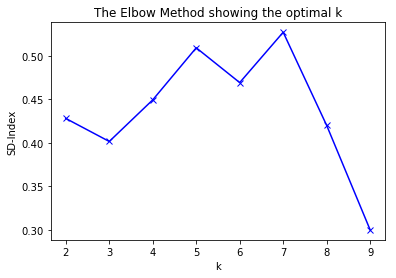

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('SD-Index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope

[[2, 0.12011403201443127],
 [3, 0.1070814138860493],
 [4, -0.0578768776195121],
 [5, 0.03999894045509822],
 [6, -0.05984185311346257],
 [7, -0.04781592403716839],
 [8, 0.0264589182606223]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
